In [419]:
#skew detection notebook add imports here
import random
import math 
import matplotlib.pyplot as plt
import scipy.stats as stats
SKEW_TO_CONTROL_PROPORTION = .51
NUMBER_OF_SIMULATIONS = 1000
SAMPLE_INTERVAL = 50


In [420]:
# create a function to some coin flips with... 1 or 0 with a p of 0.55 vs 0.45
# can either return the p_hat or the full set of data... either is probably ok

def run_simulation(n, skew = SKEW_TO_CONTROL_PROPORTION):
    random.seed("connor's random number seed")  
    sum = 0;
    p_hat = 0;
    results = []
    for i in range(n):
        rand = random.randint(1, 1000)
        if(rand > skew*1000) : 
            result = 1
            sum += 1
        else : result = 0
        results.append(result)
        p_hat = sum/n
    return p_hat    

In [423]:
# make function to run multiple simulations and return z scores + sample sizes

def run_multiple_simulation(n = NUMBER_OF_SIMULATIONS, sample_interval = SAMPLE_INTERVAL, u = 0.5): 
    p_hats = []
    z_scores = []
    sample_errors = []
    samples = []

    for i in range(25,n+25):
        sample_size = i*(sample_interval)
        samples.append(sample_size)
        p_hat = run_simulation(sample_size)
        p_hats.append(p_hat)
        se = math.sqrt((u * (1-u)) / sample_size)
        sample_errors.append(se)
        z_score = (p_hat - u) / se
        z_scores.append(z_score)
        
    return z_scores, samples, p_hats

In [424]:
z_scores, samples, p_hats = run_multiple_simulation(n = NUMBER_OF_SIMULATIONS, sample_interval = SAMPLE_INTERVAL)

for i, z in enumerate(z_scores):
    if(abs(z) > 5): 
        print(z)
        print(i)
        print(samples[i])


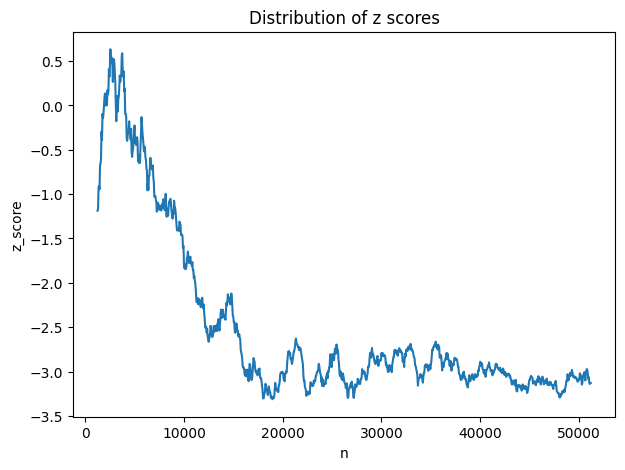

The mean_z is: -2.4976143452249433


In [417]:
plt.figure(figsize=[7,5])
plt.plot(samples, z_scores)
plt.xlabel('n')
plt.ylabel('z_score')
plt.title('Distribution of z scores')
plt.show()

# Calculate the average z score
mean_z = sum(z_scores) / len(z_scores)

# Print the result
print("The mean_z is:", mean_z)

In [418]:
# create function to get p_values from zscores 

def p_values_from_zscores(z_scores):
    p_values = []
    for z in z_scores:
        p_value = stats.norm.cdf(z)
        p_values.append(p_value)
    return p_values



In [410]:
# graph the distribution of p values (with n as the x axis)

In [411]:
p_values = p_values_from_zscores(z_scores)

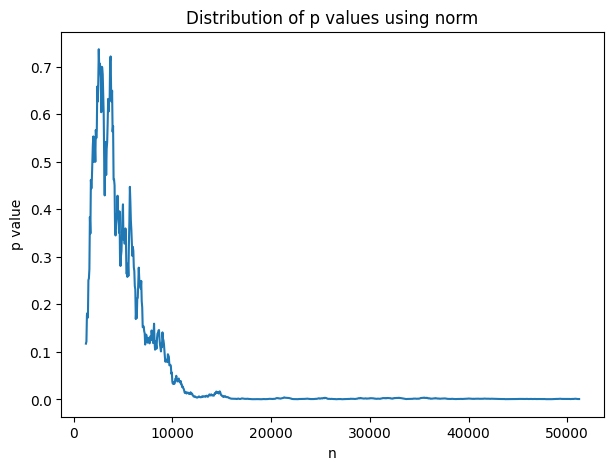

In [412]:
plt.figure(figsize=[7,5])
plt.plot(samples, p_values)
plt.xlabel('n')
plt.ylabel('p value')
plt.title('Distribution of p values using norm')
plt.show()